<a href="https://colab.research.google.com/github/devonreing/AI/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP Classifier for Asteroids
Author: Devon Reing

This assignment aims to use an MLP classifier in order to correctly train, test, and validate that the model can sort asteroids into hazardous and non-hazardous types. The data used by the classifier are data points provided by NASA about each asteroid's geometry, path, and speed. The type of MLP classifier used in this experiment is a binary classification, meaning two options are possible for the output namely hazardous and non-hazardous.

The first code section below imports the necessary packages, loads the data set from my google drive, and prints out the information of the imported data set.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AI_ML_Datasets/nasa_asteroid.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

The code section below removes any non-numerical data from the data set imported above so that it can be used by the MLP classifier, and then splits the data using a 70/30 split into training and testing subsets. Once that is complete, the training subset is split using a 90/10 split for training and validation subsets. The data for the X values is then stadardized to ensure the numeric data is all operating on the same balanced scale.

Once all the data sets are correctly created and assigned, the MLP can be created and trained using a partial fit. This classification is then plotted on one graph illustrating the training, testing, and validation accuracies of the model.

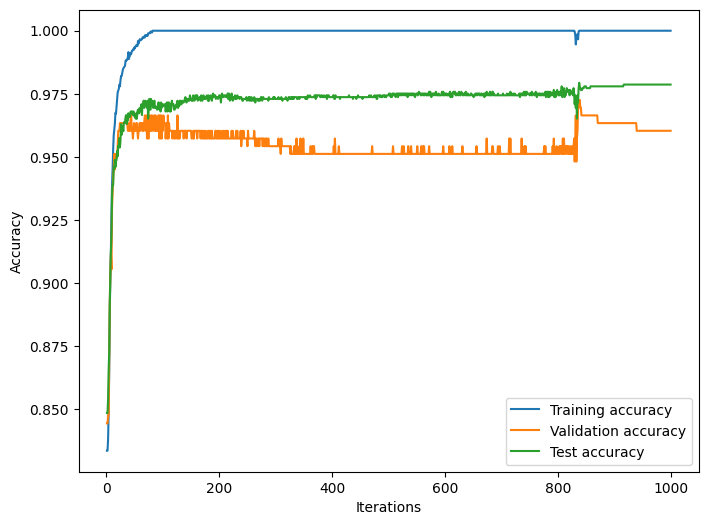

In [29]:
# drop any non-numerical data and any duplicate data in differing units
data = data.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)'], axis=1)

# load X with all the rows besides the hazardous/non-hazardous classification and y with the correct classification for each row
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the data values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(40, 50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    val_accuracies.append(mlp.score(X_val_scaled, y_val))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

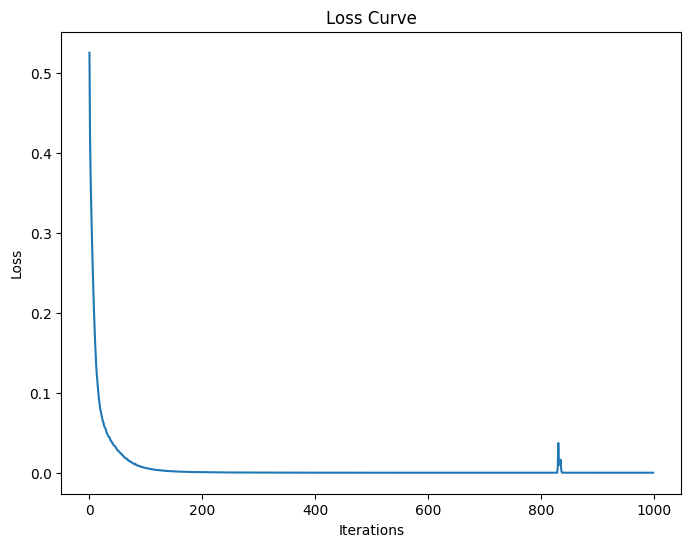

In [30]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [31]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

Layer 0 - Weight matrix shape: (26, 40)
Layer 1 - Weight matrix shape: (40, 50)
Layer 2 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (40,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (1,)


In [32]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9786780383795309


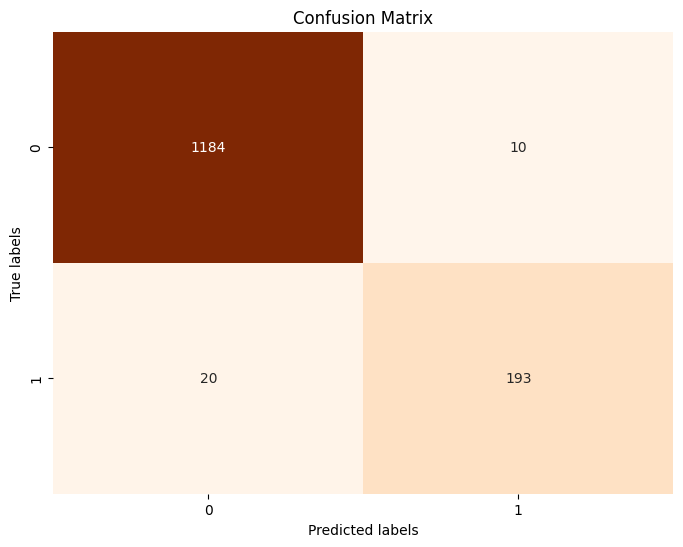

In [36]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix of a set creates a heatmap illustrating how well the model does at classifying each asteroid. A good model will only have non-zero values at 1, 1 and 0, 0 as that indicates that there were only true positives and true negatives.